# Figure 10: CUTE input and results

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import pickle
from matplotlib import colormaps as cm
from matplotlib.ticker import MaxNLocator


APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale to range of 0-1 for matplotlib
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

def pt_yan2020(P, T1, P1, T2, P2):
    """Returns P-T profile using the Yan et al. 2020 parameterization."""
    # define layers and temperatures
    T = np.zeros(len(P))
    layer0 = P <= P1
    layer2 = P >= P2

    # log-linear in middle layer
    A = (T1-T2)/(np.log10(P1)-np.log10(P2))
    B =  T2 - np.log10(P2) * A
    T = np.log10(P) * A + B

    # Isothermal for upper/lower region
    T[layer0] = T1
    T[layer2] = T2
    return T

pressure = np.logspace(-8, 2, 100) # -6 or -8
temperature = pt_yan2020(pressure, T1=4320, P1=10**-3.10, T2=2200, P2=10**-1.7)

def pt_CUTE(P):
    """P-T profile constrained by CUTE sat."""
    T_CUTE, logP_CUTE = np.array([
    [3445.1921600736914, 1.9668389539941764],
    [3409.114170206233, -0.0009211401668198782],
    [3611.5091346399877, -1.8413591934906015],
    [4096.259147433599, -2.891561332582767],
    [4817.946880917046, -3.5577503710147784],
    [5898.239598792282, -4.182692799754353],
    [7192.953277723762, -4.65881991709738],
    [8439.435034031016, -5.070569571669817],
    [9709.840847448955, -5.482421575149679],
    [11315.567268819404, -5.959879228289234],
    [12778.38902819712, -6.543677396243792],
    [13930.453917404433, -7.168926871705642],
    [14556.957166982242, -7.920270201115603],
    [14971.598178189453, -9.24824727496034],
    [15074.458830151987, -10.446548283097076],
    [15056.291899083979, -11.409037408525665],
    [15038.764648687385, -12.478481142213807],
    [4360.8310731282945, -3.12798730873547],
    [4505.398904866689, -3.2997287753953106],
    [4625.786807225836, -3.428586049843906],
    [5009.97901847398, -3.665523770533741],
    [5178.342971188787, -3.8159766644490993],
    [5370.50304488, -3.9451409856199726],
    [5538.355253057674, -4.0100301929276805],
    [5706.207461235353, -4.074919400235395],
    [6066.091806969963, -4.247582007062064],
    [6497.492451768075, -4.377769817307194],
    [6761.296760657083, -4.485850263548429],
    [6305.844122613992, -4.334169182743968],
    [7001.304948569672, -4.61521928253415],
    [7408.909472391382, -4.766695665523764],
    [7744.23008034389, -4.832301315183453],
    [7960.0583388772375, -4.918786141957929],
    [8199.682718386981, -4.983982395987917],
    [3975.103628268767, -2.634358528222702],
    [3854.3319175067827, -2.441328488818373],
    [3781.4083209661744, -2.2485031472288908],
    [3684.6886034491577, -2.0769663783839025],
    [3586.305716186478, -1.627347628064062],
    [3537.050304488001, -1.391842792078187],
    [3536.026815413744, -1.2207154188628913],
    [3510.9513330945174, -1.0280947750882659],
    [3461.69592139604, -0.7925899391023923],
    [3460.544496187504, -0.6000716442351899],
    [3483.0612558210933, -0.3648738549715862],
    [3410.521467683333, -0.23622127833784257]
    ]).T
    psorted = np.argsort(logP_CUTE)
    
    T_interp = np.interp(x=pressure, fp=T_CUTE[psorted], xp=10**logP_CUTE[psorted])
    return T_interp

temperature_CUTE = pt_CUTE(pressure)

## Fig. 10a: P-T profile and Emission Contribution Function (CUTE)

In [ ]:
fig = plt.figure(figsize=(APJ_SINGLE_COL, APJ_SINGLE_COL))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig, width_ratios=[2.,1.,0.1], wspace=0.)
ax = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
cax2 = fig.add_subplot(spec[0, 2])

ax.plot(temperature, pressure, color='k', lw=2., label='Yan et al. 2020 (HARPS-N)')
ax.plot(temperature_CUTE, pressure, color='magenta', lw=2, ls='--', label='Sreejith et al. 2023 (CUTE)')
ax.set_yscale('log')
#ax.set_xscale('log')
ax.invert_yaxis()
ax.tick_params(axis ='x', labelsize=TEXTSIZE)
#ax.set_xlim(1500,15000)
ax.set_xticks([2000, 8000, 14000])
ax.set_xticklabels([2000, 8000, 14000])
ax.set_title("P-T profile", size=TEXTSIZE)

ax.tick_params(axis ='y', labelsize=TEXTSIZE)
ax.set_xlabel('Temperature\n[K]', fontsize=TEXTSIZE)
              
ax.set_ylabel(r'Pressure [bar]', fontsize=TEXTSIZE, color='k')
ax.legend(fontsize=TEXTSIZE,bbox_to_anchor=(0.75, -0.25), loc='upper center')
ax.set_ylim(1e2,1e-6)
ax.set_yticks([1e2,1e0,1e-2,1e-4,1e-6])

f = '../data/ecf_W189b_pRT_1D_CUTE_chem_eq_all_small.pkl'
wavelengths_um, pressures, eccf = pickle.load(open(f, 'rb'))

# wavelengths_um = wavelengths_um[::-2]
# pressures = pressures[::-2]
# eccf = eccf[::-2,::-2]
# import os
# fnew = '../data/ecf_W189b_pRT_1D_CUTE_chem_eq_all_small.pkl'
# print(fnew)
# pickle.dump([wavelengths_um, pressures, eccf], open(fnew, 'wb'))

x, y = np.meshgrid(wavelengths_um, pressures)
contour = ax2.contourf(x, np.log10(y), eccf, 10, cmap=cm['Greys'])

#ax.set_xscale('log')
ax2.set_ylim([2, -6])
ax2.set_yticks([2,0,-2,-4,-6])
ax2.set_yticklabels([])
ax2.set_xlim([wavelengths_um[0], wavelengths_um[-1]])

ax2.set_xlabel('Wavelength\n[$\mu$m]', size=TEXTSIZE, color = 'indigo')
ax2.set_title("Emission\nContribution\nFunction", size=TEXTSIZE)
ax2.annotate(r'Fe I', xy=(1.2, -4), xytext=(1.25,-5), size=TEXTSIZE, arrowprops=dict(facecolor='black', headwidth=5, headlength=5, shrink=0.01, width=0.5))
ax2.tick_params(axis ='x', labelsize=TEXTSIZE, labelcolor = 'indigo')

ax.tick_params(top=True, right=True)
ax2.set_xticks([1.25,1.4])
ax2.tick_params(top=True, right=True)



cbar = plt.colorbar(mappable=contour, cax=cax2)

# Get current ticks
ticks = cbar.get_ticks()

# Format tick labels as percentages
labels = [f'{t*100:.0f}%' for t in ticks]

# Set new tick labels
cbar.set_ticks(ticks)
cbar.set_ticklabels(labels)
cbar.ax.tick_params(labelsize=TEXTSIZE)


plt.savefig(f'../figures/Fig10_CUTE_P-T_profile.png', dpi=150, bbox_inches='tight')
plt.savefig(f'../figures/Fig10_CUTE_P-T_profile.pdf', bbox_inches='tight')
plt.show()

## Fig. 10b: S/N map Fiducial (P-T profile CUTE)

In [52]:
import pickle
from matplotlib import pyplot as plt
import os
from astropy import units as u
import sys
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [53]:
def get_planet_params(data, trial_kp, trial_vsys):
    yy, xx = np.meshgrid(trial_kp, trial_vsys)
    indmax = np.unravel_index(data.argmax(), data.shape)
    vsys_max, kp_max = xx[indmax], yy[indmax]
    value_max = data[indmax]
    return vsys_max, kp_max, value_max

In [54]:
APJ_SINGLE_COL = 3.5
APJ_DOUBLE_COL = 7.
TEXTSIZE=12

In [55]:
def plot_detection_matrix(data, dkp_all, dvsys_all, kp, vsys, mode='snr', title='', interp_method='bicubic', ax='None', **kwargs):
    """Plot Kp-vsys map."""
    extend='neither'
    quantity = r'S/N'
    cmap = kwargs.pop('cmap', 'Reds_r')
    markercolor = 'w'
    snr_min = kwargs.pop('snr_min', np.nanmin(data))
    snr_max = kwargs.pop('snr_max', np.ceil(10*np.nanmax(data))/10.)

    snr_step = kwargs.pop('snr_step', 0.25)
    ncolors = int(1+(snr_max - snr_min)/snr_step)
    if ncolors > 256:
        ncolors = 256

    cmap = mpl.colormaps[cmap]
    cmap.set_bad('gray',1.)
    bounds = np.round(np.linspace(snr_min, snr_max, ncolors), 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # Create figure and axes
    sf=10
    if ax == 'None':
        fig = plt.figure(figsize=(TEXTWIDTH, TEXTWIDTH))
        gs = gridspec.GridSpec(1, 2, width_ratios=[0.95,0.035], wspace=0.025)
        ax = plt.subplot(gs[0,0])
        cax = plt.subplot(gs[0,1])
    else:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.0)

    # Set appropriate ranges
    dvsys = dvsys_all[1]-dvsys_all[0]
    dkp = dkp_all[1]-dkp_all[0]
    global extent
    extent=[
        (dvsys_all[0]-dvsys/2.)/1e3,
        (dvsys_all[-1]+dvsys/2.)/1e3,
        (dkp_all[0]-dkp/2.+kp)/1e3,
        (dkp_all[-1]+dkp/2.+kp)/1e3
    ]

    # Plot matrix
    im = ax.imshow(data.T, origin='lower',
                   extent=extent,
                   aspect='auto', cmap=cmap,
                   norm=norm, interpolation=interp_method)
    ax.tick_params(labelsize=TEXTSIZE)
    #ax.set_xlabel(r'System velocity (km/s)', size=TEXTSIZE)
    #ax.set_ylabel(r'$\rm{K}_{\rm{p}}$ (km/s)', size=TEXTSIZE)

    # Plot dotted lines to the planet's estimate (vsys, kp)
    bads = np.isnan(data)
    data_masked = np.copy(data)
    data_masked[bads] = 0.
    vsys_max, kp_max, value_max = get_planet_params(data_masked, kp+dkp_all, dvsys_all) # find min instead of max in this mode

    #vsys += 4e3
    ax.plot([vsys/1e3, vsys/1e3], [extent[2], (kp-15e3)/1e3], ls='--', color='w', lw=2, label='expected')
    ax.plot([vsys/1e3, vsys/1e3], [(kp+15e3)/1e3, extent[3]-25], ls='--', color='w', lw=2)
    ax.plot([extent[0], (vsys-10e3)/1e3], [kp/1e3, kp/1e3], ls='--', color='w', lw=2)
    ax.plot([(vsys+10e3)/1e3, extent[1]], [kp/1e3, kp/1e3], ls='--', color='w', lw=2)
    ax.scatter( (vsys_max)/1e3, (kp_max)/1e3, marker="8", s=20, facecolors='w', edgecolors='k', linewidths=0.5, label='maximum SNR')
    
    # Add text with highest SNR
    print(f'S/N_max, {value_max}')
    ax.annotate('{} = {:.1f}\n'.format(quantity, value_max),
                (0.5, 0.975), xycoords='axes fraction', ha='center', va='top', size=TEXTSIZE, color='w', fontweight='bold')

    # Plot colorbar
    cbar = plt.colorbar(mappable=im, cax=cax,extend=extend)
    #cbar.set_label('{}'.format(quantity), size=TEXTSIZE)
    cax.tick_params(labelsize=TEXTSIZE)

    # Set title
    #leg = ax.legend(fontsize=TEXTSIZE, frameon=False)
    #plt.setp(leg.get_texts(), color='w')
    ax.set_xlim(dvsys_all[0]/1e3, dvsys_all[-1]/1e3)
    ax.set_ylim(kp/1e3+dkp_all[0]/1e3, kp/1e3+dkp_all[-1]/1e3)
    return ax, cax, cbar

In [56]:
vsys = -20.82e3 * (u.m/u.s) # Yan 2020
kp = 197e3 * (u.m/u.s) # Aderson 2018

In [57]:
def gen_snr_plots(dirin_list, specie, cmap, plot_title, plot_contour=False):
    """Generate Kp-vsys S/N maps."""

    title_list = [
        f'{plot_title}',
        f'{plot_title} (night 1)',
        f'{plot_title} (night 2)'
    ]

    for dirin, title in zip(dirin_list, title_list):
        f = open(os.path.join(dirin, 'snrmap.pkl'), 'rb')
        trial_kp, trial_vsys, snrmatrix = pickle.load(f)

        fig, ax = plt.subplots(figsize=(APJ_SINGLE_COL, APJ_SINGLE_COL))
        
        if plot_contour:
            X, Y = np.meshgrid(trial_vsys/1e3 + vsys.to(u.km/u.s).value, trial_kp/1e3)
            plt.contour(X, Y, snrmatrix.T, color='r', levels=[snrmatrix.max()-1])

        ax, cax, cbar = plot_detection_matrix(
        data=snrmatrix,
        dkp_all=trial_kp-kp.to(u.m/u.s).value,
        dvsys_all=trial_vsys+vsys.to(u.m/u.s).value,
        kp=kp.to(u.m/u.s).value,
        vsys=vsys.to(u.m/u.s).value,
        cmap=cmap,
        ax=ax
        )
        ax.set_title(title, size=TEXTSIZE, fontweight='bold')
        ax.set_ylabel('Keplerian velocity [km/s]', size=TEXTSIZE)
        ax.set_xlabel('System velocity [km/s]', size=TEXTSIZE)
        cbar.set_label('S/N', size=TEXTSIZE)
        yield fig, ax

S/N_max, 9.909165682187954


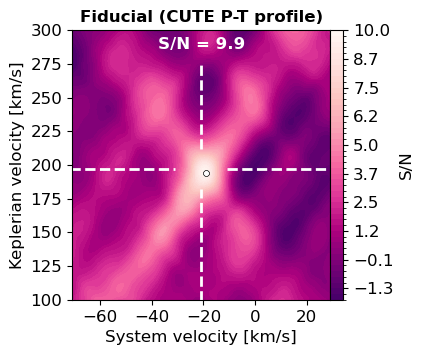

In [58]:
specie = 'all'
dirin_list = [
    f'../data/xcor_out/WASP-189_2023A_2023_06_09_2024A_2024_04_19/W189b_pRT_1D_CUTE_chem_eq_all/NPC_7_mp_70_ccw'
]
snr_plots = gen_snr_plots(
    dirin_list=dirin_list,
    specie=specie,
    cmap='RdPu_r',
    plot_title='Fiducial (CUTE P-T profile)',
    plot_contour=False
)
extensions = ['']
for (fig, ax), ext in zip(snr_plots, extensions):
    
    plt.savefig(f'../figures/Fig10b_fiducial_CUTE_snrmap{ext}.png', dpi=150, bbox_inches='tight')
    plt.savefig(f'../figures/Fig10b_fiducial_CUTE_snrmap{ext}.pdf', bbox_inches='tight')
    plt.show()